<a href="https://colab.research.google.com/github/dungnvKOD/DL/blob/master/src/mnist/EX_MNIST_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets.mnist import load_data
from keras.optimizers import SGD

import matplotlib.pyplot as plt

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


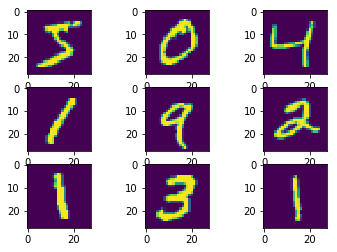

In [2]:
(X_train,y_train),(X_test,y_test)=load_data()

print(X_train.shape)

for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(X_train[i])
plt.show()


In [0]:
def load_dataset():
    (X_train,y_train),(X_test,y_test)=load_data()
    y_train=to_categorical(y_train,num_classes=10)
    y_test=to_categorical(y_test,num_classes=10)
    return X_train,y_train,X_test,y_test
    

In [0]:
def prep_pixel(X_train,X_test):
    X_train=X_train.reshape(X_train.shape[0],28,28,1)
    X_test=X_test.reshape(X_test.shape[0],28,28,1)
    
    X_train=X_train.astype('float32')
    X_test=X_test.astype('float32')
    
    X_train=X_train/255.0
    X_test=X_test/255.0
    return X_train,X_test

#  Define model

In [0]:
def define_model():
    model=Sequential()
    model.add(Conv2D(64,(3,3),activation=tf.nn.relu,kernel_initializer='he_uniform',padding='same',input_shape=(28,28,1)))
    model.add(Conv2D(64,(3,3),activation=tf.nn.relu,kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPool2D((2,2)))
    model.add(Flatten())
    
    model.add(Dense(128,activation=tf.nn.relu,kernel_initializer='he_uniform'))
    model.add(Dense(10,activation=tf.nn.softmax))
    
    opt=SGD(lr=0.01,momentum=0.9)
    
    model.compile(optimizer=opt,loss='categorical_crossentropy')
    
    return model
    
    

In [6]:

X_train,y_train,X_test,y_test=load_dataset()

X_train,X_test=prep_pixel(X_train,X_test)


model=define_model()
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),
          batch_size=32, epochs=10, verbose=1)


print("dung....")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.1169 - val_loss: 0.0420
Epoch 2/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.0383 - val_loss: 0.0355
Epoch 3/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0214 - val_loss: 0.0327
Epoch 4/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0135 - val_loss: 0.0399
Epoch 5/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0084 - val_loss: 0.0380
Epoch 6/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0060 - val_loss: 0.0485
Epoch 7/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0030 - val_loss: 0.0329
Epoch 8/10
60000/60000 [==============================] - 10s 166us/step - loss: 